In [1]:
CONFIG_PATH = "configs/finetune_CURIO_tmp.yml"

In [2]:

from utils import get_config
from superdebug import debug
from collections import Counter
from urllib.parse import urlparse
from process_data import get_model_input
config = get_config(CONFIG_PATH, print_config = False) # default config
target, original_feature_map, categorical_features, string_features, train_data, test_data, test_data_info, train_submission_upvote_df, num_all_users = get_model_input(config)

为了使用邮件提醒功能，请设置环境变量MY_QQ_EMAIL（QQ邮箱地址）与MY_QQ_EMAIL_PWD（QQ邮箱授权码）
------------------ 2022-10-24 16:22:17 ------------------
GPU ready...
------------------ 2022-10-24 16:22:19 ------------------
DEBUG: at /home/TableSense/largedisk/wanrong/Curation-Modeling/process_data.py:364 get_model_input
Loading prepared data...
------------------ 2022-10-24 16:22:19 ------------------


Version 7.5.0 of praw is outdated. Version 7.6.0 was released Tuesday May 10, 2022.


In [3]:
subreddit_datapoint_counter = Counter(train_data["SUBREDDIT"]) + Counter(test_data["SUBREDDIT"])
print(subreddit_datapoint_counter)

Counter({'r/The Positive Corner': 832, 'r/Trivia': 756, 'r/Out of Context Quotes': 752, 'r/Team Mignon': 712, 'r/Food': 540, 'r/LOLCHI': 441, 'r/Team Llama': 420, 'r/Random': 374, 'r/Team PhThree': 98, 'r/Stanford HCI': 20})


In [4]:
url_counter = Counter([urlparse(_).netloc for _ in train_data["SUBMISSION_URL"].to_list()])

In [5]:
from collections import Counter, defaultdict, OrderedDict
debug(train_upvote = sum(train_data["VOTE"] == 1),
    train_downvote = sum(train_data["VOTE"] == 0),
    test_upvote = sum(test_data["VOTE"] == 1),
    test_downvote = sum(test_data["VOTE"] == 0),
    )
user_votes = Counter()
submission_votes = Counter()
subreddit_subreddit_votes = defaultdict(Counter)
for row_i, row in train_data.iterrows():
    submission_votes[row["SUBMISSION_ID"]] += 1
    user_votes[row["USERNAME"]] += 1
    subreddit_subreddit_votes[row["SUBREDDIT"]][row["VOTE"]] += 1
    if "users" not in subreddit_subreddit_votes[row["SUBREDDIT"]]:
        subreddit_subreddit_votes[row["SUBREDDIT"]]["users"] = set()
    subreddit_subreddit_votes[row["SUBREDDIT"]]["users"].add(row["USERNAME"])


------------------ 2022-10-24 16:22:21 ------------------
DEBUG: 4 vars: ['train_upvote', 'train_downvote', 'test_upvote', 'test_downvote'], at <ipython-input-5-bf241b5dc052>:5 <module>
0 / 1.  train_upvote num val: 565
1 / 2.  train_downvote num val: 3391
2 / 3.  test_upvote num val: 141
3 / 4.  test_downvote num val: 848
------------------ 2022-10-24 16:22:21 ------------------


------------------ 2022-10-24 16:22:22 ------------------
DEBUG: 1 vars: ['distribution'], at <ipython-input-6-07c3b14be516>:12 draw_histogram
0 / 5.  distribution str len 257: OrderedDict([(31, 1), (37, 1), (38, 1), (43, 2), (56, 1), (57, 1), (104, 1), (105, 1), (120, 1), (135, 1), (136, 1), (140, 1), (149, 1), (151, 1), (168, 1), (182, 1), (206, 1), (210, 1), (223, 1), (227, 1), (243, 1), (244, 1), (299, 1), (300, 1), (309, 1)])
------------------ 2022-10-24 16:22:22 ------------------
------------------ 2022-10-24 16:22:22 ------------------
DEBUG: at <ipython-input-6-07c3b14be516>:14 draw_histogram
10% of x take up 7.6923% of distribution
------------------ 2022-10-24 16:22:22 ------------------


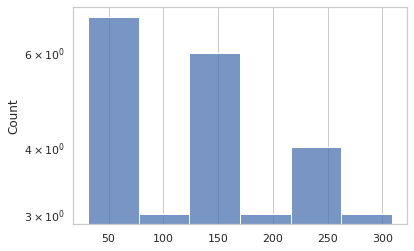

------------------ 2022-10-24 16:22:22 ------------------
DEBUG: at <ipython-input-6-07c3b14be516>:19 draw_histogram
Figure saved in output/user_votes_distribution.png
------------------ 2022-10-24 16:22:22 ------------------
------------------ 2022-10-24 16:22:22 ------------------
DEBUG: 1 vars: ['distribution'], at <ipython-input-6-07c3b14be516>:12 draw_histogram
0 / 6.  distribution str len 197: OrderedDict([(1, 1), (3, 3), (4, 29), (5, 36), (6, 52), (7, 36), (8, 17), (9, 2), (10, 8), (11, 12), (12, 27), (13, 35), (14, 46), (15, 32), (16, 21), (17, 14), (18, 7), (19, 4), (20, 1), (21, 1)])
------------------ 2022-10-24 16:22:22 ------------------
------------------ 2022-10-24 16:22:22 ------------------
DEBUG: at <ipython-input-6-07c3b14be516>:14 draw_histogram
10% of x take up 1.0417% of distribution
------------------ 2022-10-24 16:22:22 ------------------


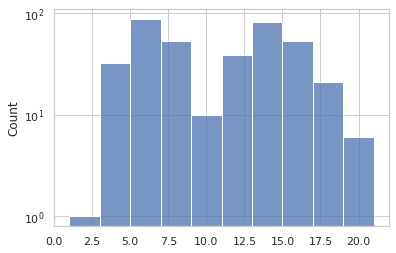

------------------ 2022-10-24 16:22:23 ------------------
DEBUG: at <ipython-input-6-07c3b14be516>:19 draw_histogram
Figure saved in output/submission_votes_distribution.png
------------------ 2022-10-24 16:22:23 ------------------


In [6]:
from importlib_metadata import distribution
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
def draw_histogram(nums:list, file_name):
    sns.set_theme(style="whitegrid")
    ax = sns.histplot(data=nums)
    ax.set_yscale('log')
    # ax.set_xscale('log')
    distribution = OrderedDict(sorted(list(Counter(nums).items())))
    debug(distribution=str(distribution))
    # ax.text(-0.15, 1.1, distribution, fontsize=7, transform=ax.transAxes)
    debug(f"10% of x take up {sum(OrderedDict(list(distribution.items())[:len(distribution)//10]).values()) / sum(distribution.values()) * 100:.4f}% of distribution")
    save_path = f"output/{file_name}.png"
    plt.show()
    plt.savefig(save_path, dpi = 300)
    plt.close()
    debug(f"Figure saved in {save_path}")

draw_histogram(list(user_votes.values()), "user_votes_distribution")
draw_histogram(list(submission_votes.values()), "submission_votes_distribution")

In [7]:
for subreddit in subreddit_subreddit_votes:
    subreddit_subreddit_votes[subreddit]["downvote_rate"] = 100 * subreddit_subreddit_votes[subreddit][0] / (subreddit_subreddit_votes[subreddit][1] + subreddit_subreddit_votes[subreddit][0])
    subreddit_subreddit_votes[subreddit]["subreddit"] = original_feature_map["SUBREDDIT"][subreddit]
    subreddit_subreddit_votes[subreddit]["users"] = str(subreddit_subreddit_votes[subreddit]["users"])
subreddit_subreddit_votes = pd.DataFrame(list(subreddit_subreddit_votes.values())).set_index("subreddit")
debug(subreddit_votes=subreddit_subreddit_votes)
save_path = "output/subreddit_votes_users.csv"
subreddit_subreddit_votes.to_csv(save_path)
debug(f"Votes of each subreddit is saved to {save_path}")

KeyError: 'r/Team Mignon'